In [8]:
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
import math
import time

%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 8)

In [11]:
np.random.seed(0)
x1 = np.random.normal(20, 3, 20)
y0 = 5 + 0.5 * x1
y1 = 5 + 0.5 * x1 + np.random.normal(0, 1, 20)


In [12]:
x1

array([25.29215704, 21.20047163, 22.93621395, 26.7226796 , 25.60267397,
       17.06816636, 22.85026525, 19.54592838, 19.69034344, 21.23179551,
       20.43213071, 24.36282052, 22.28311318, 20.36502505, 21.3315897 ,
       21.00102298, 24.48223722, 19.38452521, 20.9392031 , 17.43771278])

In [16]:
y0

array([17.64607852, 15.60023581, 16.46810698, 18.3613398 , 17.80133699,
       13.53408318, 16.42513263, 14.77296419, 14.84517172, 15.61589775,
       15.21606536, 17.18141026, 16.14155659, 15.18251252, 15.66579485,
       15.50051149, 17.24111861, 14.6922626 , 15.46960155, 13.71885639])

In [14]:
y1

array([15.0930887 , 16.25385441, 17.33254318, 17.61917478, 20.07109161,
       12.07971751, 16.47089114, 14.58578034, 16.37795094, 17.08525652,
       15.37101278, 17.55957278, 15.25377084, 13.20171606, 15.3178827 ,
       15.65686046, 18.47140929, 15.89464245, 15.08227474, 13.41655364])

The rsquared values is 0.5759696028216693


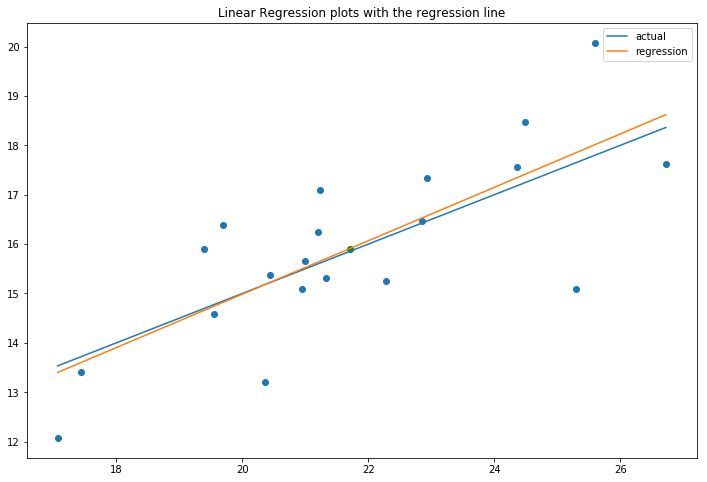

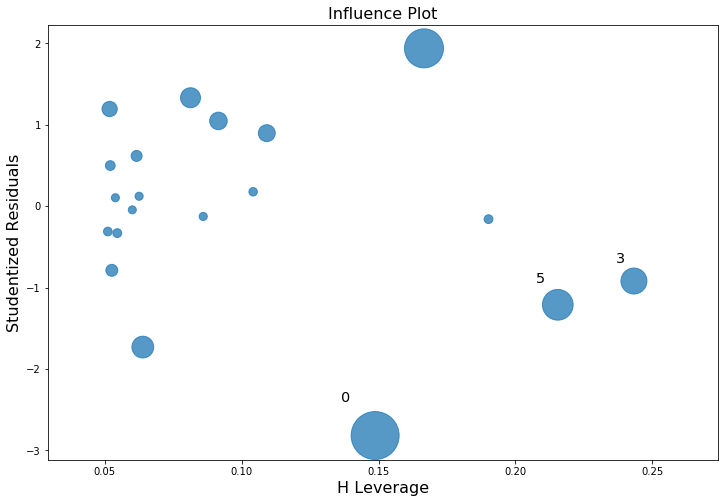

In [15]:
lm = sm.OLS(y1, sm.add_constant(x1)).fit()
print("The rsquared values is " + str(lm.rsquared))

plt.scatter(np.sort(x1), y1[np.argsort(x1)])
plt.scatter(np.mean(x1), np.mean(y1), color = "green")
plt.plot(np.sort(x1), y0[np.argsort(x1)], label = "actual")
plt.plot(np.sort(x1), lm.predict()[np.argsort(x1)], label = "regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm, alpha  = 0.05, ax = ax, criterion="cooks")


In [ ]:
#the Leverage v.s. Studentized residuals plot. y axis(verticle axis) is the studentized residuals indicating 
#if there is any outliers based on the alpha value(significace level). 
#It shows point 0(the first data point) is like an outlier a little based on current alpha. 
#Point 5 and 3 are high leverage data points. Generally there isn't any issue with this regression fitting.

The rsquared values is 0.6835270587597565


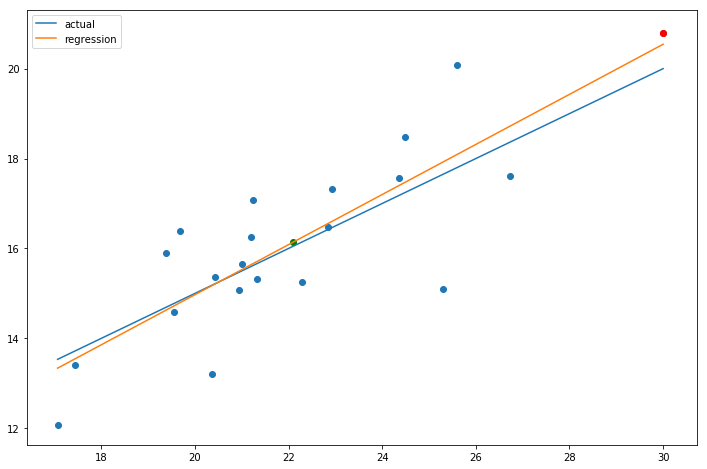

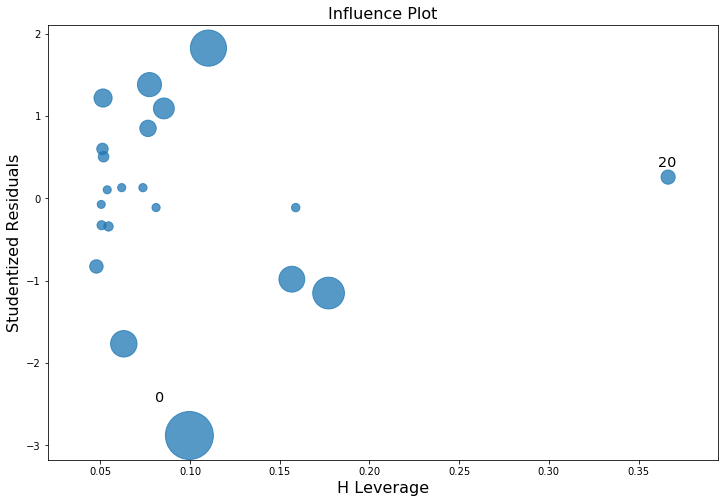

In [17]:
x2 = np.r_[x1, 30]
y2 = np.r_[y1, 20.8]
y20 = np.r_[y0, 20]

lm2 = sm.OLS(y2, sm.add_constant(x2)).fit()
print ("The rsquared values is " + str(lm2.rsquared))

plt.scatter(np.sort(x2), y2[np.argsort(x2)])
plt.scatter(30, 20.8, color = "red")
plt.scatter(np.mean(x2), np.mean(y2), color = "green")
plt.plot(np.sort(x2), y20[np.argsort(x2)], label = "actual")
plt.plot(np.sort(x2), lm2.predict()[np.argsort(x2)], label = "regression")
plt.legend()
plt.plot()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm2, ax= ax, criterion="cooks")

In [ ]:
#There is high leverage point (30, 20.8). This point has higher leverage than the others but 
#There is no outliers. Because of this, its R2=0.684 which is higher than the case 1.

The rsquared values is 0.2737752662801516


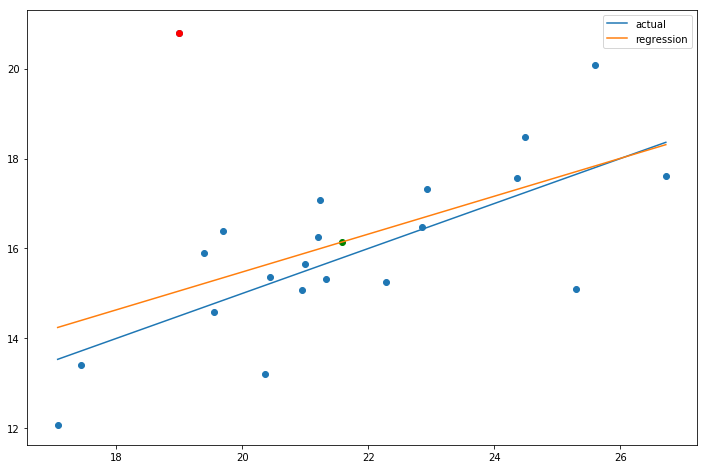

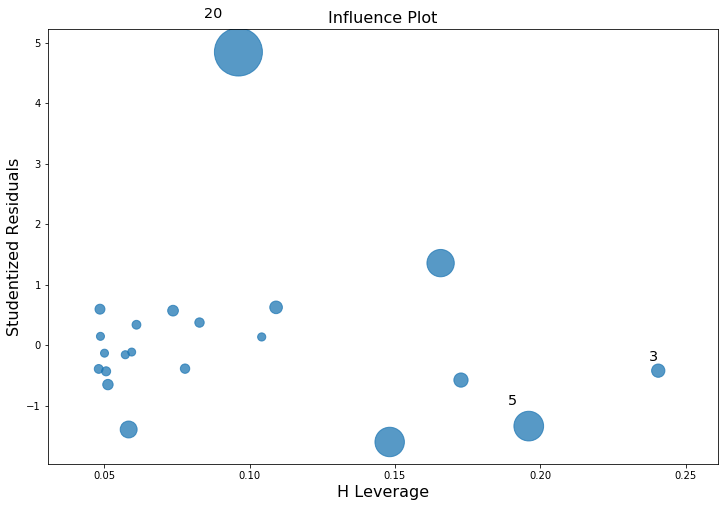

In [20]:
x3 = np.r_[x1, 19]
y3 = np.r_[y1, 20.8]
y30 = np.r_[y0, 5 + .5 * 19]

lm3 = sm.OLS(y3, sm.add_constant(x3)).fit()
print ("The rsquared values is " + str(lm3.rsquared))

plt.scatter(np.sort(x3), y3[np.argsort(x3)])
plt.scatter(19, 20.8, color = "red")
plt.scatter(np.mean(x3), np.mean(y3), color = "green")
plt.plot(np.sort(x3), y30[np.argsort(x3)], label = "actual")
plt.plot(np.sort(x3), lm3.predict()[np.argsort(x3)], label = "regression")
plt.legend()
plt.plot()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm3, ax= ax, criterion="cooks")

In [ ]:
#There is an outlier (19, 20.8). It has high normalized residual.
#Different from high leverage point, the outlier will distort the regression line thus the R2 is down to 0.274.

The rsquared values is 0.028865535723009983


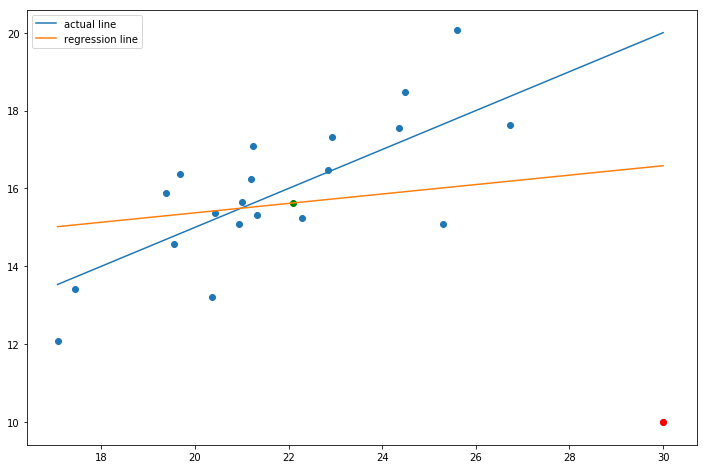

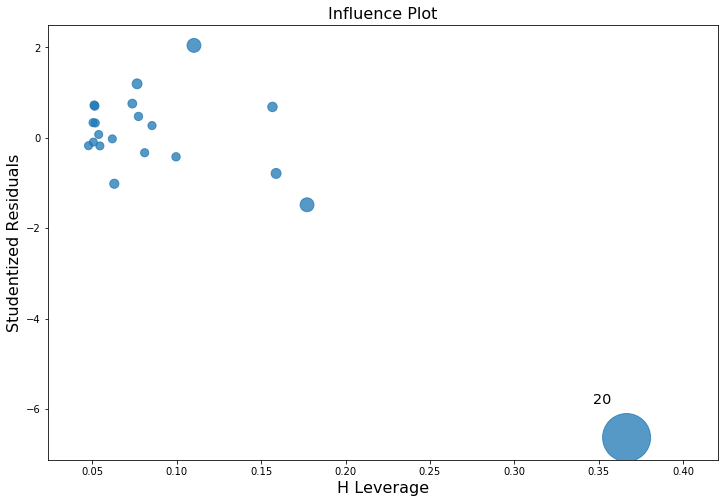

In [22]:
x4 = np.r_[x1, 30]
y4 = np.r_[y1, 10]
y40 = np.r_[y0, 20]

lm4 = sm.OLS(y4, sm.add_constant(x4)).fit()
print ("The rsquared values is " + str(lm4.rsquared))

plt.scatter(np.sort(x4), y4[np.argsort(x4)])
plt.scatter(30, 10, color = "red")
plt.scatter(np.mean(x4), np.mean(y4), color = "green")
plt.plot(np.sort(x4), y40[np.argsort(x4)], label = "actual line")
plt.plot(np.sort(x4), lm4.predict()[np.argsort(x4)], label = "regression line")
plt.legend()
plt.plot()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm4, ax= ax, criterion="cooks")

In [ ]:
#There is high leverage and outlier point (30, 10).
#The regression line was distorted severely. R2 = 0.029 which is very low.